In [56]:
#Student ID: 1804900

#CE310 - Reassessment Assignment pt.1 
#core functions for steady state (no generations) binary GA:
import random # randomly generate populations of chromosomes
import numpy as np # for array operations
import time 

# implement genetic operators:
    # 1-point crossover
    # flip bit mutation
    # tournament selection

#Define GA Hyper-Parameters - based on lecture 

n_bits = 120 # changes based on problem
n_pop = 10 # population size
n_gen = 30 # number of generations
p_xo = 0.7  # crossover rate
p_mut = 0.05 # mutation rate 
neval = 0 # number of fitness evaluations

n_Tselections = 3 # number of Tournament selections


def init_pop(n): # Iniatialise Population for Evaluation of Fitness
    population = []
    for i in range(n):
        chromosome = np.random.randint(0, 2, n_bits) # array of randomly generated bits, length of n_bits
        population.append((chromosome, fitness_func(chromosome))) #add individual and fitness_i to population
    return population
    
#def fitness_func(chromosome): # Evaluate fitness of chromosome - fitness evaluation for maximising the ones
#    global neval #increments every time fitness function is called - has to be a global variable for this to be possible
#    neval = neval + 1
#    return str(chromosome).count('1') # count 1's in chromosome - we want as many as possible

def fitness_func(chromosome):
    
    global neval #increments every time fitness function is called - has to be a global variable for this to be possible
    neval = neval + 1
    
    first_half = chromosome[:60] 
    second_half = chromosome[60:]
        
    return (np.count_nonzero(first_half == 0) + np.sum(second_half))
    
def tournament_select(inv): # tournament selection function - inv = inverse
    
    index = np.random.randint(0, len(population), n_Tselections)
    #creates an array containing n_Tselections (number of) random indexes to select from population
    
    fitness = np.array([population[individual][1] for individual in index])
    #creates array of fitnesses in respect to the selected indexes in population
        
    if not inv: #For cloning individuals with best fitness from selection
        individual = fitness.argmax()
    else: # for replacing individuals with worst fitness from selection
        individual = fitness.argmin()

    return index[individual]
    
def crossover(): #1-point crossover
    xoCUT = random.randint(1, n_bits-1) # (crossover point) cut is always after 1st bit and before last bit
    i1 = tournament_select(False) # select individuals for next generation
    i2 = tournament_select(False)
    
    first_part = population[i1][0][:xoCUT] #first index of tuple <- chromosome
    second_part = population[i2][0][xoCUT:]
    
    offspring = np.hstack([first_part, second_part]) 
    # Concatenate first section of the first individual, up to and including crossover (CUT) point,
    # with the other part of the second chromosome (after cut to the end of chromosome).
    
    #print(offspring)
    
    #print("crossover -> tournament")
    index = tournament_select(True) #inverse = true
    #New individual replaces current individual in population that has the lowest fitness
    population[index] = (offspring, fitness_func(offspring))
    #update population - replace individual with worst fitness from selection with newly generated offspring
    
    return index
    
def flip_mutation(index): # flip-bit mutation function
    mutated_chromosome = population[index][0] #first index = chromosome - array of bits
    for i in range(len(mutated_chromosome)):
        r = np.random.random() # r = random number generated from a uniform distribution over [0, 1]
        if r <= p_mut: #r less than or equal to probability of mutation
            if mutated_chromosome[i] == 0:
                #flip bits - mutation occurs
                mutated_chromosome[i] = 1
            else:
                mutated_chromosome[i] = 0
    population[index] = (mutated_chromosome, fitness_func(mutated_chromosome))
    #update population - old individual replaced by mutated chromosome (evolution)    
    
def output():
    for p in population:
        print('\nPopulation: ', p[0], '\nFitness: ' + str(p[1]) + ' out of ' +str(n_bits))

In [65]:
## Fifty-Fifty:

n_pop = 45 # population size
n_gen = 45 #number of generations
p_xo = 0.85 # probability of crossover
p_mut = 0.01 # probability of mutation
n_Tselections = 4 # no of tournament selections
neval=0 # no of fitness evaluations
n_bits = 120 # no of bits
neval = 0 # no of fitness evaluations
population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            index_i = tournament_select(False)
        
        # mutation
        flip_mutation(index_i)
        
    

print("\nNumber of Fitness Evaluations:", neval)

### ### METHOD OF FINDING FITTEST INDIVIDUAL (1) - results

###fit_ = 0 #(fitness of chromosome)
###count = 0

###for p in population: # iterate through array of tuples (population)
    ###if fit_ < p[1]: # fit_ will equal highest fitness of chromosome
        ###fit_ = p[1] 
        
###for p in population: 
    ###if p[1] == fit_: #to find and count individuals with highest fitness
        ###count = count + 1

        
        
###h_f = fit_
###highest=np.array([item[0] for item in population if item[1] == h_f]) #create array of highest individuals (as there may be multiple)

# number of individuals that have the highest fitness, h_f

###n_i = count
###print("\nNumber of Individuals with highest fitness:", n_i)


#print(highest)
###print("\nFittest individual:", highest[0]) #pick first item of array, to print the hoghest individual (may be multiple copies)
###print("\nFitness of individual:", h_f)

fit_ = np.array([p[1] for p in population]) # (fitness of chromosome)

#print("..........")

#print(fit_)

#count=0
#for i in fit_:
    #count=count+1
#print("no. of elements:", count)
#print("..........")

### METHOD OF FINDING FITTEST INDIVIDUAL (2) - results

h_f = np.amax(fit_)
highest=np.array([item[0] for item in population if item[1] == h_f]) #create array of highest individuals (as there may be multiple)

# number of individuals that have the highest fitness, h_f

n_i = len(highest)
print("\nNumber of Individuals with highest fitness:", n_i)


print("\nFittest individual:", highest[0]) #pick first item of array, to print the highest individual (may be multiple copies)
print("\nFitness of individual:", h_f)



Generation: 1

Population:  [1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 0 1 0 0] 
Fitness: 72 out of 120

Population:  [0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1
 0 1 0 0 1 1 1 1 1] 
Fitness: 68 out of 120

Population:  [0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 1 0 1] 
Fitness: 60 out of 120

Population:  [1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 

# Questions & Asnwers:

## 1. Fifty-Fifty

*What solutions do you expect in both cases?*

- Maximise Fitness: I expect the GA to work properly in producing a solution where the 1st half of the chromosome consists of all 0s, and the second half represents all 1s.

- Minimise Fitness: I expect the GA to produce the opposite result; all 1s in the first half, and 0s in the second.


# Hyper-Parameter Analysis

In [4]:
### Functions for plotting
import matplotlib.pyplot as plt

def details(n_gen, f_median, f_mean, f_low, f_high):
    np_fitness = np.array([p[1] for p in population])
    gen.append(n_gen)
    f_high.append(np.amax(np_fitness))
    f_low.append(np.amin(np_fitness))
    f_median.append(np.median(np_fitness))
    f_mean.append(np.mean(np_fitness ))
    
def output_to_graph(gen, f_median, f_mean, f_low, f_high):
    plt.title('Results')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.plot(gen, f_median, color="red", label="median")
    plt.plot(gen, f_mean, color="blue", label="mean")
    plt.plot(gen, f_high, color="yellow", label="highest fitness")
    plt.plot(gen, f_low, color="black", label="lowest fitness")
    plt.legend()
    plt.show()

In [8]:
### STORAGE Lists for each Test 
### ADD STORAGE for Test 1 results - 10 runs in total
test1_storage = []
test2_storage = []
test3_storage = []
test4_storage = []
test5_storage = []
test6_storage = []
test7_storage = []
test8_storage = []
test9_storage = []
test10_storage = []

In [134]:
test11_storage = []

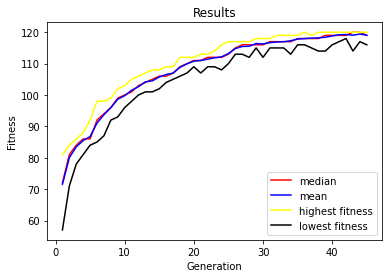

Final Generation: 
Median Fitness: 119.0 
Mean Fitness: 119.04444444444445 
Lowest: 116 out of 120 
Highest: 120 out of 120


In [47]:
def store_results_1(gen, f_median, f_mean, f_low, f_high):
    test1_storage.append((gen, f_median, f_mean, f_low, f_high))
    
def store_results_2(gen, f_median, f_mean, f_low, f_high):
    test2_storage.append((gen, f_median, f_mean, f_low, f_high))
    
def store_results_3(gen, f_median, f_mean, f_low, f_high):
    test3_storage.append((gen, f_median, f_mean, f_low, f_high))
    
def store_results_4(gen, f_median, f_mean, f_low, f_high):
    test4_storage.append((gen, f_median, f_mean, f_low, f_high))
    
def store_results_5(gen, f_median, f_mean, f_low, f_high):
    test5_storage.append((gen, f_median, f_mean, f_low, f_high))
    
def store_results_6(gen, f_median, f_mean, f_low, f_high):
    test6_storage.append((gen, f_median, f_mean, f_low, f_high))
    
def store_results_7(gen, f_median, f_mean, f_low, f_high):
    test7_storage.append((gen, f_median, f_mean, f_low, f_high))
    
def store_results_8(gen, f_median, f_mean, f_low, f_high):
    test8_storage.append((gen, f_median, f_mean, f_low, f_high))
    
def store_results_9(gen, f_median, f_mean, f_low, f_high):
    test9_storage.append((gen, f_median, f_mean, f_low, f_high))
    
def store_results_10(gen, f_median, f_mean, f_low, f_high):
    test10_storage.append((gen, f_median, f_mean, f_low, f_high))
    
def store_results_11(gen, f_median, f_mean, f_low, f_high):
    test11_storage.append((gen, f_median, f_mean, f_low, f_high))

### Testing Hyper Parameters - Test1:
#n_pop = 10 # population size
#n_gen = 30 # number of generations
#p_xo = 0.7  # crossover rate
#p_mut = 0.01 # mutation rate 
#n_Tselections = 3 # number of Tournament selections
#neval = 0 # No. of fitness evaluations

### Test2 ###
#n_pop = 20 #(increase)
#n_gen = 30 
#p_xo = 0.7 
#p_mut = 0.01
#n_Tselections = 3
#neval = 0

### Test 3 ###
#n_pop = 20 
#n_gen = 30 
#p_xo = 0.8 #(increase) 
#p_mut = 0.01 
#n_Tselections = 3
#neval=0

### Test 4 ###
#n_pop = 20 
#n_gen = 30 
#p_xo = 0.8  
#p_mut = 0.01 
#n_Tselections = 4 #(increase)
#neval=0

### Test 5 ###
#n_pop = 20 
#n_gen = 30 
#p_xo = 0.8  
#p_mut = 0.05 #(increase) 
#n_Tselections = 4
#neval=0

### Test 6 ###
#n_pop = 30 #(increase)
#n_gen = 30 
#p_xo = 0.8  
#p_mut = 0.01 #(decrease)
#n_Tselections = 4
#neval=0

### Test 7 ###
#n_pop = 40 #(increase)
#n_gen = 40 #(increase)
#p_xo = 0.8  
#p_mut = 0.01
#n_Tselections = 2 #(decrease)
#neval=0

### Test 8 ###
#n_pop = 40 
#n_gen = 40 
#p_xo = 0.8
#p_mut = 0.01
#n_Tselections = 3 #(increase)
#neval=0

### Test 9 ###
#n_pop = 45 
#n_gen = 40 
#p_xo = 0.85 #(increase)  
#p_mut = 0.01 
#n_Tselections = 3 
#neval=0

### Test 10 ###
#n_pop = 45 
#n_gen = 40 
#p_xo = 0.85  
#p_mut = 0.01 
#n_Tselections = 4 #(increase)
#neval=0

### Final Test ###
n_pop = 45 
n_gen = 45 #(increase)
p_xo = 0.85 
p_mut = 0.01 
n_Tselections = 4
neval=0

### graph parameters
f_median = [] 
f_mean =  []
f_high = []
f_low = []
gen = [] 
    
population = init_pop(n_pop)

for generation in range(n_gen):
    #print("\nGeneration:", generation+1)
    #output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            index_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
    details(generation+1, f_median, f_mean, f_low, f_high)
    
output_to_graph(gen, f_median, f_mean, f_low, f_high)

print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(f_median[-1], f_mean[-1], f_low[-1], f_high[-1]))

#store_results_1(gen, f_median, f_mean, f_low, f_high)
#store_results_2(gen, f_median, f_mean, f_low, f_high)
#store_results_3(gen, f_median, f_mean, f_low, f_high)
#store_results_4(gen, f_median, f_mean, f_low, f_high)
#store_results_5(gen, f_median, f_mean, f_low, f_high)
#store_results_6(gen, f_median, f_mean, f_low, f_high)
#store_results_7(gen, f_median, f_mean, f_low, f_high)
#store_results_8(gen, f_median, f_mean, f_low, f_high)
#store_results_9(gen, f_median, f_mean, f_low, f_high)
#store_results_10(gen, f_median, f_mean, f_low, f_high)
#store_results_11(gen, f_median, f_mean, f_low, f_high)

TEST 1 CONCLUSIONS

Run 1 :


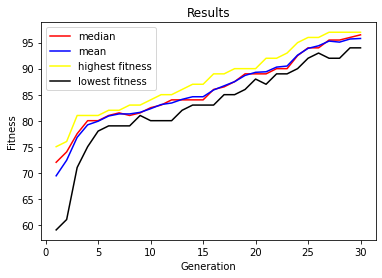

Final Generation: 
Median Fitness: 96.5 
Mean Fitness: 95.8 
Lowest: 94 out of 120 
Highest: 97 out of 120

Run 2 :


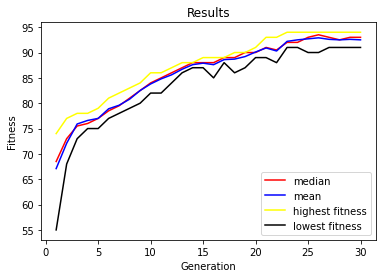

Final Generation: 
Median Fitness: 93.0 
Mean Fitness: 92.5 
Lowest: 91 out of 120 
Highest: 94 out of 120

Run 3 :


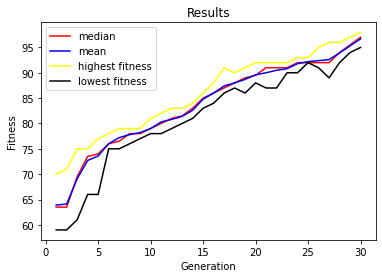

Final Generation: 
Median Fitness: 97.0 
Mean Fitness: 96.7 
Lowest: 95 out of 120 
Highest: 98 out of 120

Run 4 :


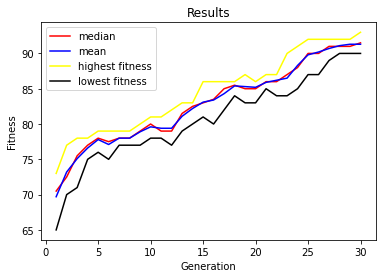

Final Generation: 
Median Fitness: 91.5 
Mean Fitness: 91.3 
Lowest: 90 out of 120 
Highest: 93 out of 120

Run 5 :


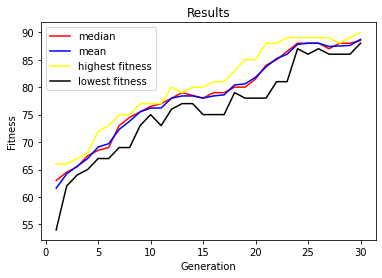

Final Generation: 
Median Fitness: 88.5 
Mean Fitness: 88.7 
Lowest: 88 out of 120 
Highest: 90 out of 120

Run 6 :


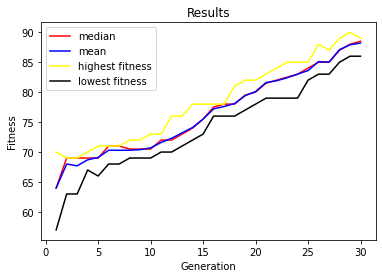

Final Generation: 
Median Fitness: 88.5 
Mean Fitness: 88.2 
Lowest: 86 out of 120 
Highest: 89 out of 120

Run 7 :


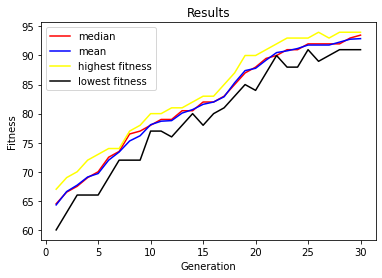

Final Generation: 
Median Fitness: 93.5 
Mean Fitness: 92.9 
Lowest: 91 out of 120 
Highest: 94 out of 120

Run 8 :


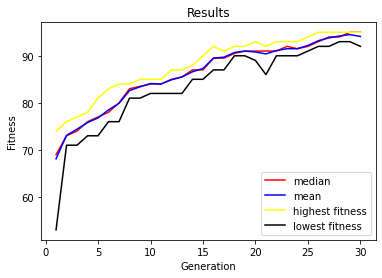

Final Generation: 
Median Fitness: 95.0 
Mean Fitness: 94.1 
Lowest: 92 out of 120 
Highest: 95 out of 120

Run 9 :


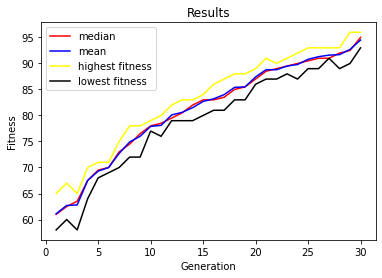

Final Generation: 
Median Fitness: 95.0 
Mean Fitness: 94.5 
Lowest: 93 out of 120 
Highest: 96 out of 120

Run 10 :


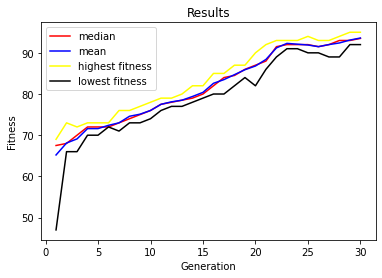

Final Generation: 
Median Fitness: 93.5 
Mean Fitness: 93.6 
Lowest: 92 out of 120 
Highest: 95 out of 120


In [21]:
### Print Conclusions - Test1
runs=0
print("TEST 1 CONCLUSIONS")
for i in test1_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

TEST 2 CONCLUSIONS

Run 1 :


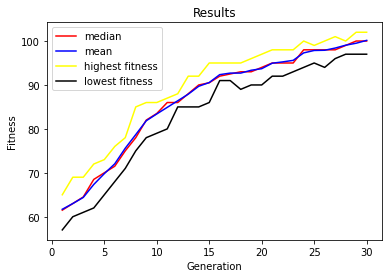

Final Generation: 
Median Fitness: 100.0 
Mean Fitness: 100.15 
Lowest: 97 out of 120 
Highest: 102 out of 120

Run 2 :


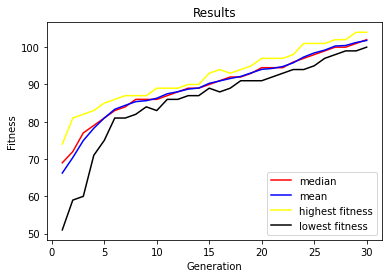

Final Generation: 
Median Fitness: 102.0 
Mean Fitness: 101.8 
Lowest: 100 out of 120 
Highest: 104 out of 120

Run 3 :


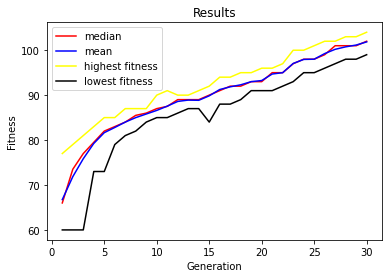

Final Generation: 
Median Fitness: 102.0 
Mean Fitness: 101.85 
Lowest: 99 out of 120 
Highest: 104 out of 120

Run 4 :


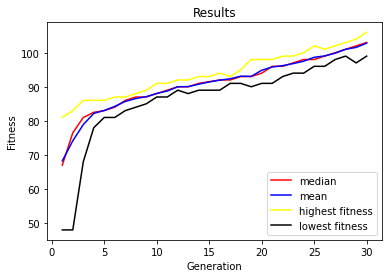

Final Generation: 
Median Fitness: 103.0 
Mean Fitness: 102.8 
Lowest: 99 out of 120 
Highest: 106 out of 120

Run 5 :


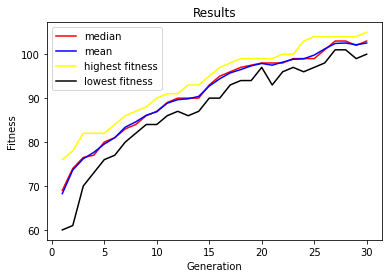

Final Generation: 
Median Fitness: 103.0 
Mean Fitness: 102.55 
Lowest: 100 out of 120 
Highest: 105 out of 120

Run 6 :


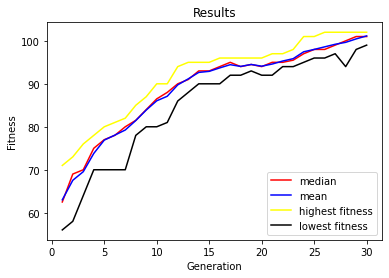

Final Generation: 
Median Fitness: 101.0 
Mean Fitness: 101.15 
Lowest: 99 out of 120 
Highest: 102 out of 120

Run 7 :


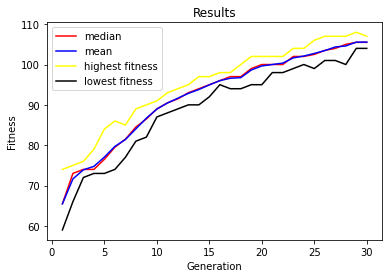

Final Generation: 
Median Fitness: 105.5 
Mean Fitness: 105.55 
Lowest: 104 out of 120 
Highest: 107 out of 120

Run 8 :


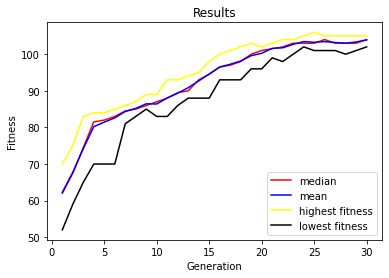

Final Generation: 
Median Fitness: 104.0 
Mean Fitness: 103.9 
Lowest: 102 out of 120 
Highest: 105 out of 120

Run 9 :


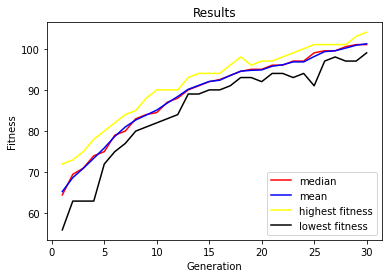

Final Generation: 
Median Fitness: 101.0 
Mean Fitness: 101.2 
Lowest: 99 out of 120 
Highest: 104 out of 120

Run 10 :


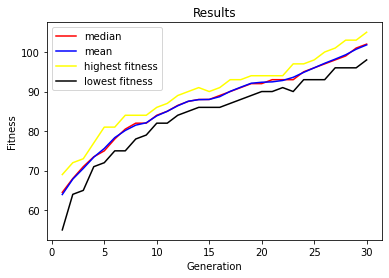

Final Generation: 
Median Fitness: 102.0 
Mean Fitness: 101.8 
Lowest: 98 out of 120 
Highest: 105 out of 120


In [93]:
### Print Conclusions - Test2
runs=0
print("TEST 2 CONCLUSIONS")
for i in test2_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

TEST 3 CONCLUSIONS

Run 1 :


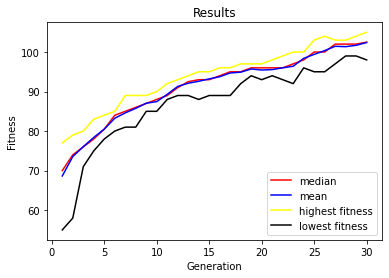

Final Generation: 
Median Fitness: 102.5 
Mean Fitness: 102.4 
Lowest: 98 out of 120 
Highest: 105 out of 120

Run 2 :


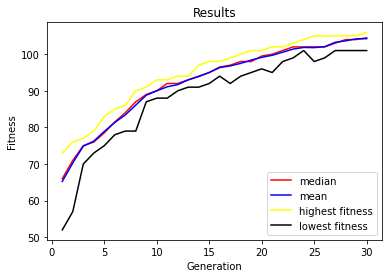

Final Generation: 
Median Fitness: 104.5 
Mean Fitness: 104.25 
Lowest: 101 out of 120 
Highest: 106 out of 120

Run 3 :


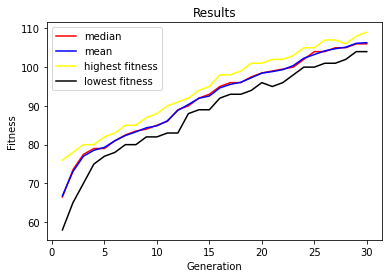

Final Generation: 
Median Fitness: 106.0 
Mean Fitness: 106.3 
Lowest: 104 out of 120 
Highest: 109 out of 120

Run 4 :


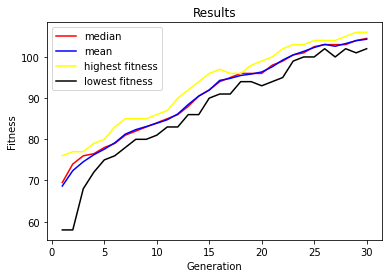

Final Generation: 
Median Fitness: 104.5 
Mean Fitness: 104.3 
Lowest: 102 out of 120 
Highest: 106 out of 120

Run 5 :


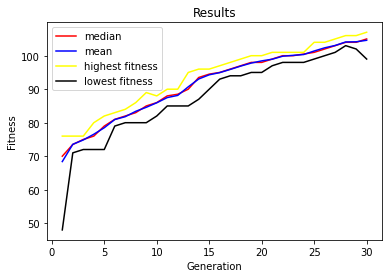

Final Generation: 
Median Fitness: 105.0 
Mean Fitness: 104.6 
Lowest: 99 out of 120 
Highest: 107 out of 120

Run 6 :


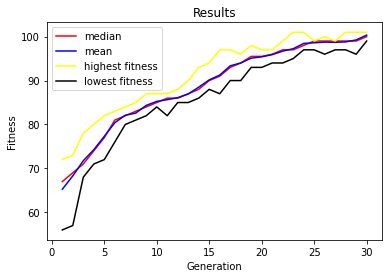

Final Generation: 
Median Fitness: 100.0 
Mean Fitness: 100.35 
Lowest: 99 out of 120 
Highest: 101 out of 120

Run 7 :


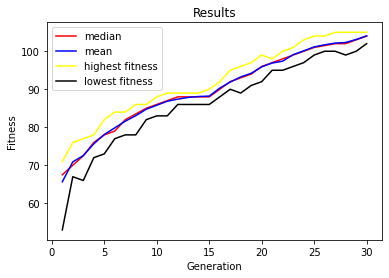

Final Generation: 
Median Fitness: 104.0 
Mean Fitness: 104.05 
Lowest: 102 out of 120 
Highest: 105 out of 120

Run 8 :


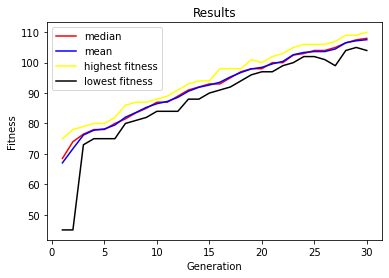

Final Generation: 
Median Fitness: 108.0 
Mean Fitness: 107.55 
Lowest: 104 out of 120 
Highest: 110 out of 120

Run 9 :


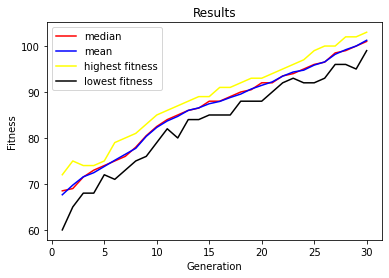

Final Generation: 
Median Fitness: 101.0 
Mean Fitness: 101.25 
Lowest: 99 out of 120 
Highest: 103 out of 120

Run 10 :


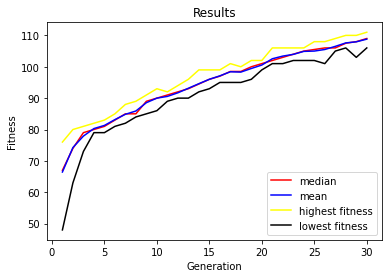

Final Generation: 
Median Fitness: 109.0 
Mean Fitness: 108.8 
Lowest: 106 out of 120 
Highest: 111 out of 120


In [92]:
### Print Conclusions - Test3
runs=0
print("TEST 3 CONCLUSIONS")
for i in test3_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

TEST 4 CONCLUSIONS

Run 1 :


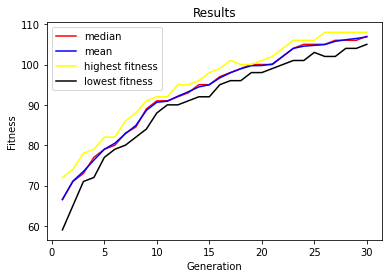

Final Generation: 
Median Fitness: 107.0 
Mean Fitness: 106.85 
Lowest: 105 out of 120 
Highest: 108 out of 120

Run 2 :


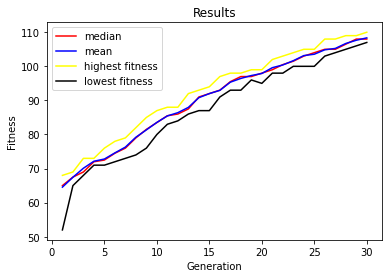

Final Generation: 
Median Fitness: 108.0 
Mean Fitness: 108.35 
Lowest: 107 out of 120 
Highest: 110 out of 120

Run 3 :


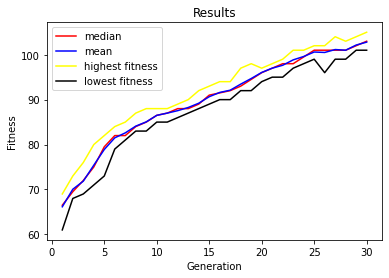

Final Generation: 
Median Fitness: 103.0 
Mean Fitness: 102.8 
Lowest: 101 out of 120 
Highest: 105 out of 120

Run 4 :


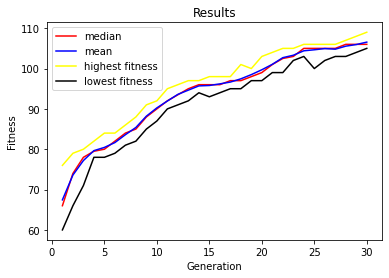

Final Generation: 
Median Fitness: 106.0 
Mean Fitness: 106.55 
Lowest: 105 out of 120 
Highest: 109 out of 120

Run 5 :


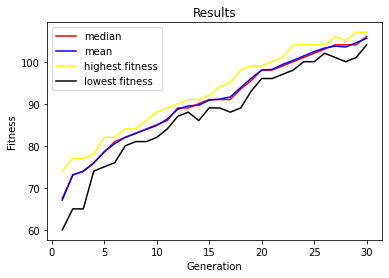

Final Generation: 
Median Fitness: 106.0 
Mean Fitness: 105.55 
Lowest: 104 out of 120 
Highest: 107 out of 120

Run 6 :


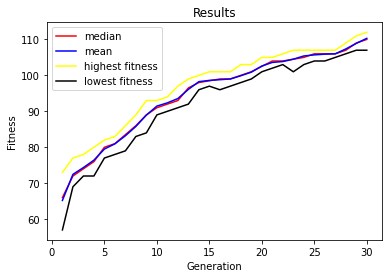

Final Generation: 
Median Fitness: 110.0 
Mean Fitness: 110.3 
Lowest: 107 out of 120 
Highest: 112 out of 120

Run 7 :


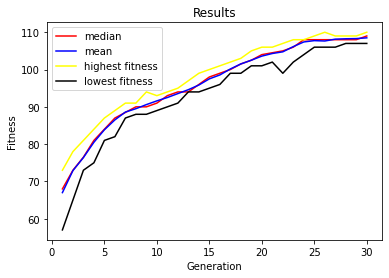

Final Generation: 
Median Fitness: 109.0 
Mean Fitness: 108.5 
Lowest: 107 out of 120 
Highest: 110 out of 120

Run 8 :


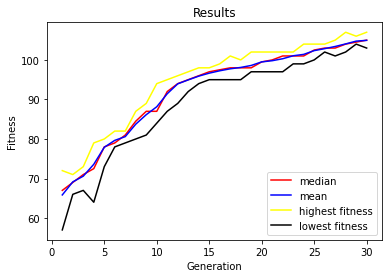

Final Generation: 
Median Fitness: 105.0 
Mean Fitness: 104.95 
Lowest: 103 out of 120 
Highest: 107 out of 120

Run 9 :


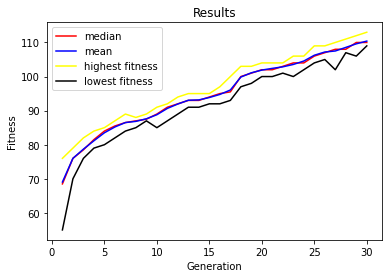

Final Generation: 
Median Fitness: 110.0 
Mean Fitness: 110.4 
Lowest: 109 out of 120 
Highest: 113 out of 120

Run 10 :


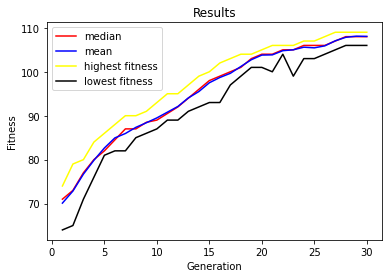

Final Generation: 
Median Fitness: 108.0 
Mean Fitness: 108.05 
Lowest: 106 out of 120 
Highest: 109 out of 120


In [91]:
### Print Conclusions - Test4
runs=0
print("TEST 4 CONCLUSIONS")
for i in test4_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

TEST 5 CONCLUSIONS

Run 1 :


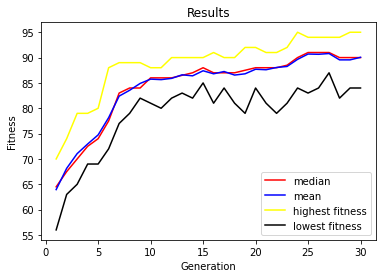

Final Generation: 
Median Fitness: 90.0 
Mean Fitness: 90.05 
Lowest: 84 out of 120 
Highest: 95 out of 120

Run 2 :


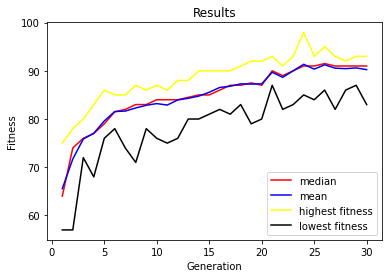

Final Generation: 
Median Fitness: 91.0 
Mean Fitness: 90.25 
Lowest: 83 out of 120 
Highest: 93 out of 120

Run 3 :


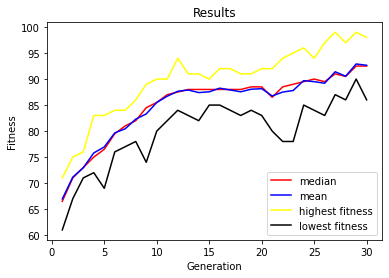

Final Generation: 
Median Fitness: 92.5 
Mean Fitness: 92.65 
Lowest: 86 out of 120 
Highest: 98 out of 120

Run 4 :


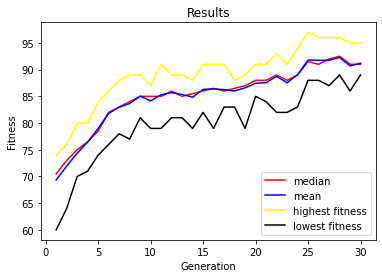

Final Generation: 
Median Fitness: 91.0 
Mean Fitness: 91.2 
Lowest: 89 out of 120 
Highest: 95 out of 120

Run 5 :


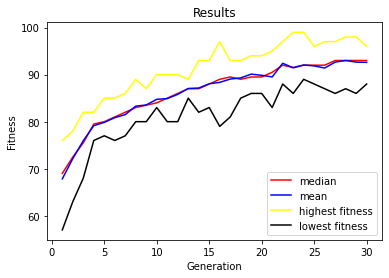

Final Generation: 
Median Fitness: 93.0 
Mean Fitness: 92.6 
Lowest: 88 out of 120 
Highest: 96 out of 120

Run 6 :


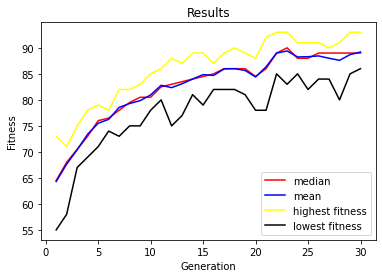

Final Generation: 
Median Fitness: 89.0 
Mean Fitness: 89.2 
Lowest: 86 out of 120 
Highest: 93 out of 120

Run 7 :


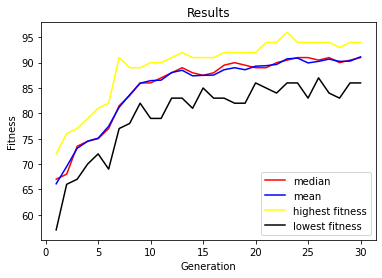

Final Generation: 
Median Fitness: 91.0 
Mean Fitness: 91.15 
Lowest: 86 out of 120 
Highest: 94 out of 120

Run 8 :


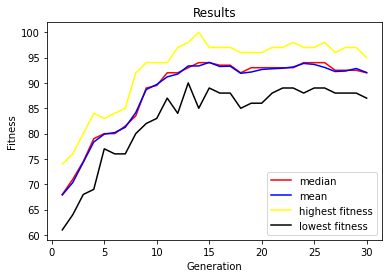

Final Generation: 
Median Fitness: 92.0 
Mean Fitness: 92.05 
Lowest: 87 out of 120 
Highest: 95 out of 120

Run 9 :


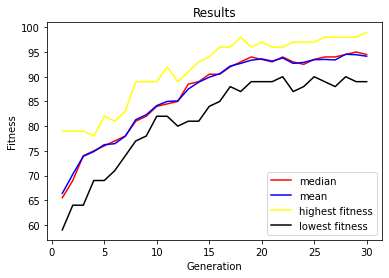

Final Generation: 
Median Fitness: 94.5 
Mean Fitness: 94.15 
Lowest: 89 out of 120 
Highest: 99 out of 120

Run 10 :


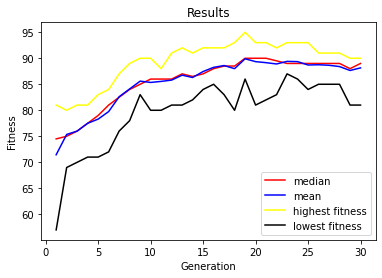

Final Generation: 
Median Fitness: 89.0 
Mean Fitness: 88.15 
Lowest: 81 out of 120 
Highest: 90 out of 120


In [90]:
### Print Conclusions - Test5
runs=0
print("TEST 5 CONCLUSIONS")
for i in test5_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

TEST 6 CONCLUSIONS

Run 1 :


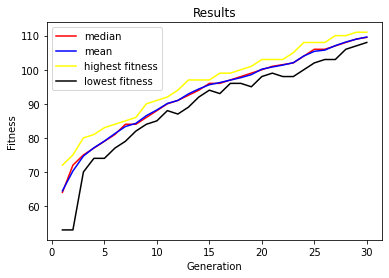

Final Generation: 
Median Fitness: 109.5 
Mean Fitness: 109.6 
Lowest: 108 out of 120 
Highest: 111 out of 120

Run 2 :


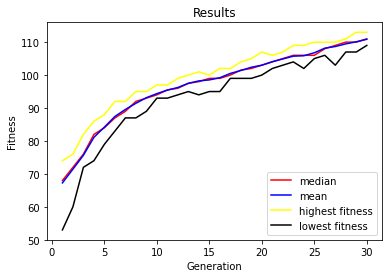

Final Generation: 
Median Fitness: 111.0 
Mean Fitness: 110.86666666666666 
Lowest: 109 out of 120 
Highest: 113 out of 120

Run 3 :


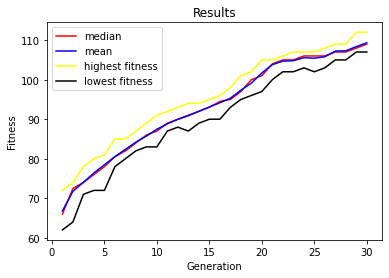

Final Generation: 
Median Fitness: 109.0 
Mean Fitness: 109.33333333333333 
Lowest: 107 out of 120 
Highest: 112 out of 120

Run 4 :


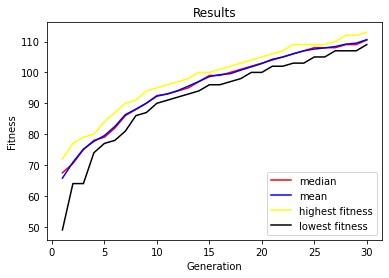

Final Generation: 
Median Fitness: 110.5 
Mean Fitness: 110.6 
Lowest: 109 out of 120 
Highest: 113 out of 120

Run 5 :


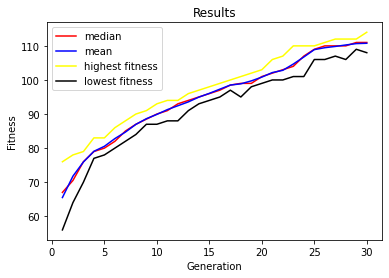

Final Generation: 
Median Fitness: 111.0 
Mean Fitness: 110.76666666666667 
Lowest: 108 out of 120 
Highest: 114 out of 120

Run 6 :


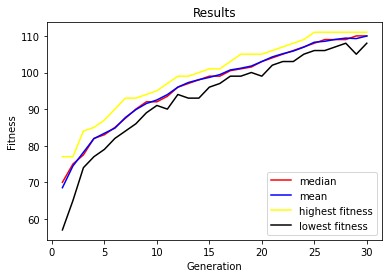

Final Generation: 
Median Fitness: 110.0 
Mean Fitness: 109.96666666666667 
Lowest: 108 out of 120 
Highest: 111 out of 120

Run 7 :


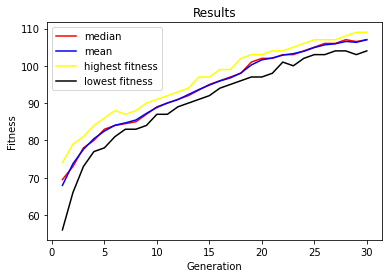

Final Generation: 
Median Fitness: 107.0 
Mean Fitness: 107.0 
Lowest: 104 out of 120 
Highest: 109 out of 120

Run 8 :


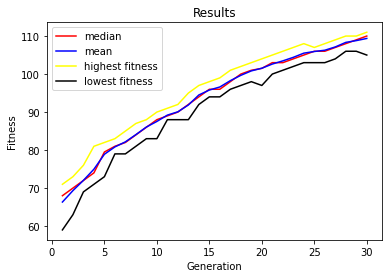

Final Generation: 
Median Fitness: 110.0 
Mean Fitness: 109.36666666666666 
Lowest: 105 out of 120 
Highest: 111 out of 120

Run 9 :


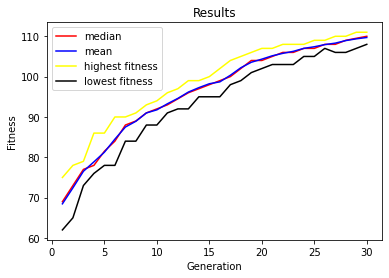

Final Generation: 
Median Fitness: 110.0 
Mean Fitness: 109.7 
Lowest: 108 out of 120 
Highest: 111 out of 120

Run 10 :


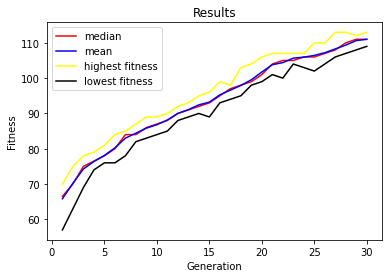

Final Generation: 
Median Fitness: 111.0 
Mean Fitness: 111.0 
Lowest: 109 out of 120 
Highest: 113 out of 120


In [89]:
### Print Conclusions - Test6
runs=0
print("TEST 6 CONCLUSIONS")
for i in test6_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

TEST 7 CONCLUSIONS

Run 1 :


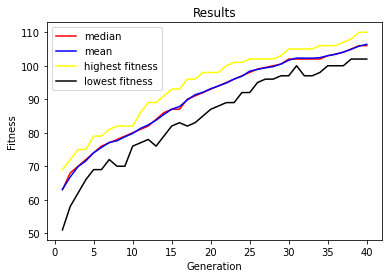

Final Generation: 
Median Fitness: 106.0 
Mean Fitness: 106.4 
Lowest: 102 out of 120 
Highest: 110 out of 120

Run 2 :


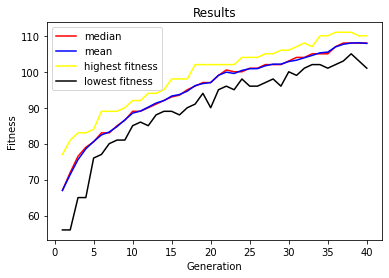

Final Generation: 
Median Fitness: 108.0 
Mean Fitness: 107.9 
Lowest: 101 out of 120 
Highest: 110 out of 120

Run 3 :


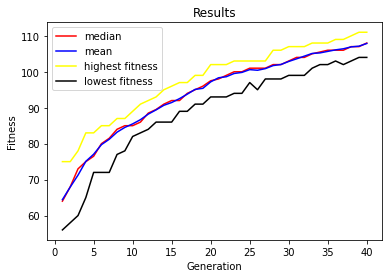

Final Generation: 
Median Fitness: 108.0 
Mean Fitness: 107.875 
Lowest: 104 out of 120 
Highest: 111 out of 120

Run 4 :


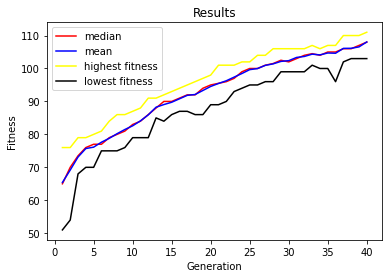

Final Generation: 
Median Fitness: 108.0 
Mean Fitness: 108.05 
Lowest: 103 out of 120 
Highest: 111 out of 120

Run 5 :


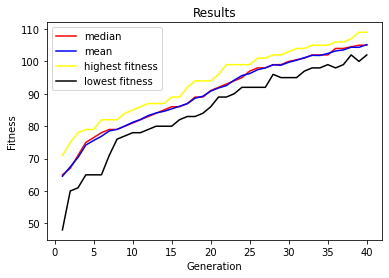

Final Generation: 
Median Fitness: 105.0 
Mean Fitness: 105.175 
Lowest: 102 out of 120 
Highest: 109 out of 120

Run 6 :


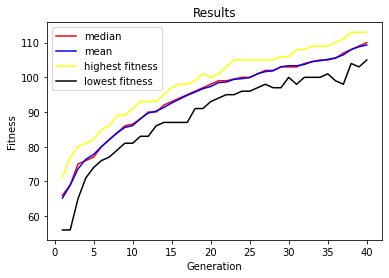

Final Generation: 
Median Fitness: 110.0 
Mean Fitness: 109.325 
Lowest: 105 out of 120 
Highest: 113 out of 120

Run 7 :


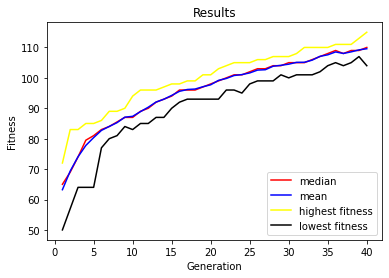

Final Generation: 
Median Fitness: 110.0 
Mean Fitness: 109.575 
Lowest: 104 out of 120 
Highest: 115 out of 120

Run 8 :


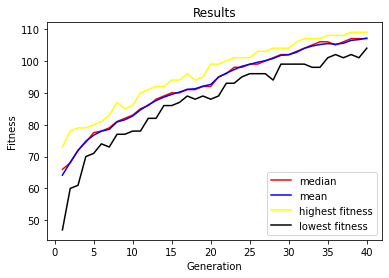

Final Generation: 
Median Fitness: 107.0 
Mean Fitness: 107.15 
Lowest: 104 out of 120 
Highest: 109 out of 120

Run 9 :


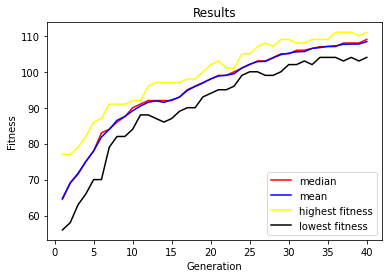

Final Generation: 
Median Fitness: 109.0 
Mean Fitness: 108.4 
Lowest: 104 out of 120 
Highest: 111 out of 120

Run 10 :


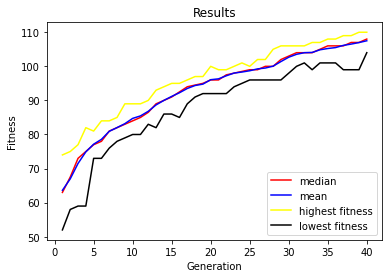

Final Generation: 
Median Fitness: 108.0 
Mean Fitness: 107.5 
Lowest: 104 out of 120 
Highest: 110 out of 120


In [95]:
### Print Conclusions - Test7
runs=0
print("TEST 7 CONCLUSIONS")
for i in test7_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

TEST 8 CONCLUSIONS

Run 1 :


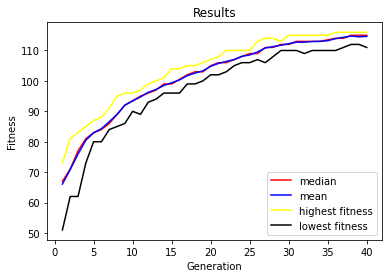

Final Generation: 
Median Fitness: 115.0 
Mean Fitness: 114.65 
Lowest: 111 out of 120 
Highest: 116 out of 120

Run 2 :


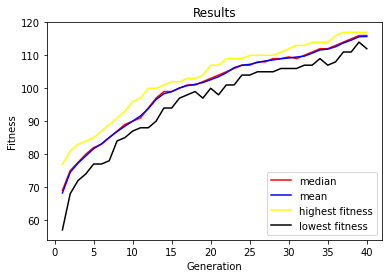

Final Generation: 
Median Fitness: 116.0 
Mean Fitness: 115.725 
Lowest: 112 out of 120 
Highest: 117 out of 120

Run 3 :


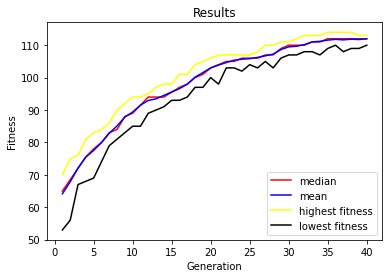

Final Generation: 
Median Fitness: 112.0 
Mean Fitness: 111.975 
Lowest: 110 out of 120 
Highest: 113 out of 120

Run 4 :


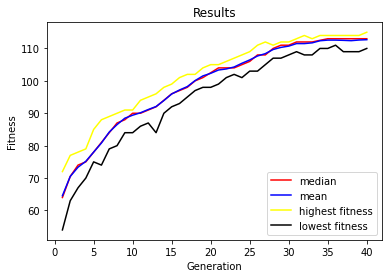

Final Generation: 
Median Fitness: 113.0 
Mean Fitness: 112.7 
Lowest: 110 out of 120 
Highest: 115 out of 120

Run 5 :


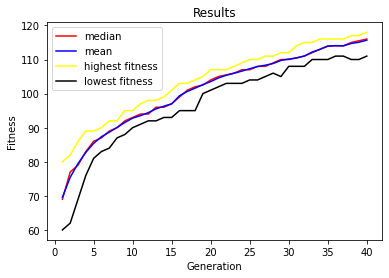

Final Generation: 
Median Fitness: 116.0 
Mean Fitness: 115.675 
Lowest: 111 out of 120 
Highest: 118 out of 120

Run 6 :


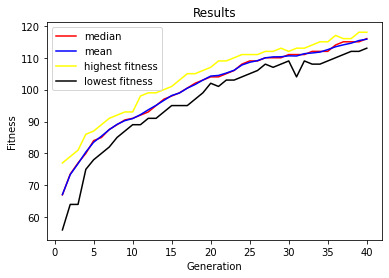

Final Generation: 
Median Fitness: 116.0 
Mean Fitness: 115.825 
Lowest: 113 out of 120 
Highest: 118 out of 120

Run 7 :


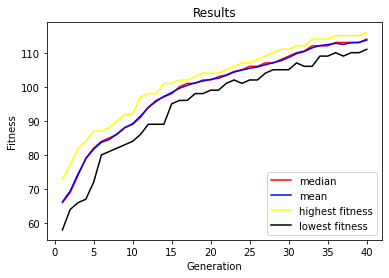

Final Generation: 
Median Fitness: 114.0 
Mean Fitness: 113.7 
Lowest: 111 out of 120 
Highest: 116 out of 120

Run 8 :


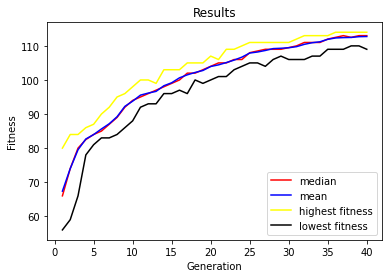

Final Generation: 
Median Fitness: 113.0 
Mean Fitness: 112.75 
Lowest: 109 out of 120 
Highest: 114 out of 120

Run 9 :


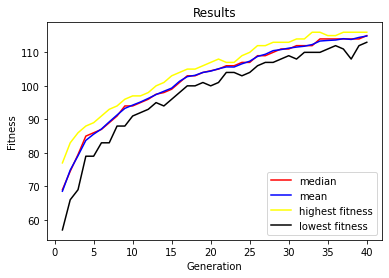

Final Generation: 
Median Fitness: 115.0 
Mean Fitness: 114.875 
Lowest: 113 out of 120 
Highest: 116 out of 120

Run 10 :


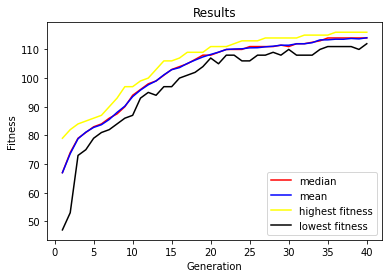

Final Generation: 
Median Fitness: 114.0 
Mean Fitness: 114.075 
Lowest: 112 out of 120 
Highest: 116 out of 120


In [118]:
### Print Conclusions - Test8
runs=0
print("TEST 8 CONCLUSIONS")
for i in test8_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

TEST 9 CONCLUSIONS

Run 1 :


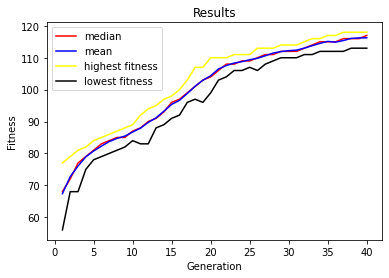

Final Generation: 
Median Fitness: 117.0 
Mean Fitness: 116.26666666666667 
Lowest: 113 out of 120 
Highest: 118 out of 120

Run 2 :


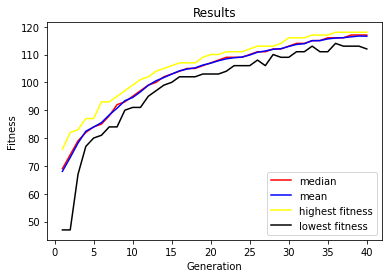

Final Generation: 
Median Fitness: 117.0 
Mean Fitness: 116.57777777777778 
Lowest: 112 out of 120 
Highest: 118 out of 120

Run 3 :


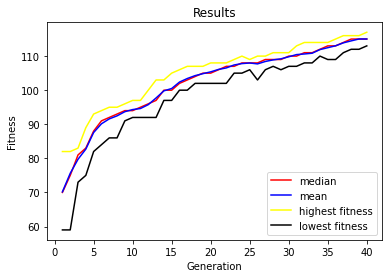

Final Generation: 
Median Fitness: 115.0 
Mean Fitness: 115.02222222222223 
Lowest: 113 out of 120 
Highest: 117 out of 120

Run 4 :


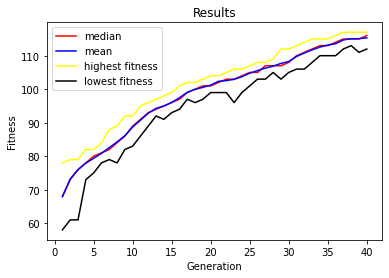

Final Generation: 
Median Fitness: 116.0 
Mean Fitness: 115.33333333333333 
Lowest: 112 out of 120 
Highest: 117 out of 120

Run 5 :


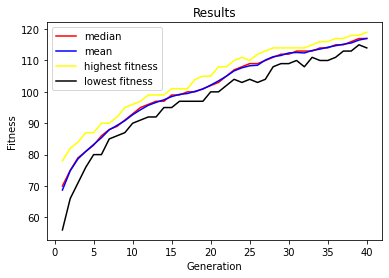

Final Generation: 
Median Fitness: 117.0 
Mean Fitness: 117.02222222222223 
Lowest: 114 out of 120 
Highest: 119 out of 120

Run 6 :


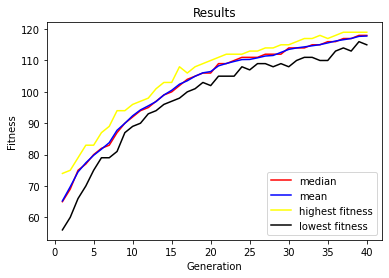

Final Generation: 
Median Fitness: 118.0 
Mean Fitness: 117.8 
Lowest: 115 out of 120 
Highest: 119 out of 120

Run 7 :


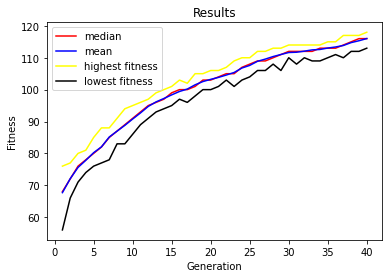

Final Generation: 
Median Fitness: 116.0 
Mean Fitness: 116.02222222222223 
Lowest: 113 out of 120 
Highest: 118 out of 120

Run 8 :


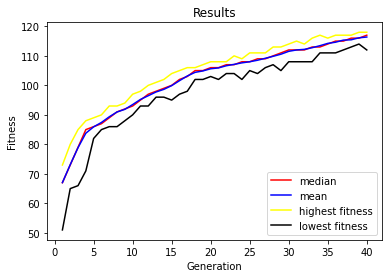

Final Generation: 
Median Fitness: 117.0 
Mean Fitness: 116.37777777777778 
Lowest: 112 out of 120 
Highest: 118 out of 120

Run 9 :


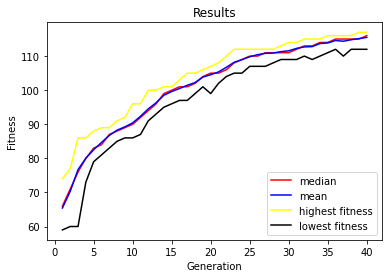

Final Generation: 
Median Fitness: 116.0 
Mean Fitness: 115.4888888888889 
Lowest: 112 out of 120 
Highest: 117 out of 120

Run 10 :


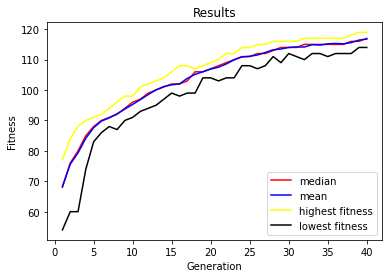

Final Generation: 
Median Fitness: 117.0 
Mean Fitness: 116.75555555555556 
Lowest: 114 out of 120 
Highest: 119 out of 120


In [117]:
### Print Conclusions - Test9
runs=0
print("TEST 9 CONCLUSIONS")
for i in test9_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

TEST 10 CONCLUSIONS

Run 1 :


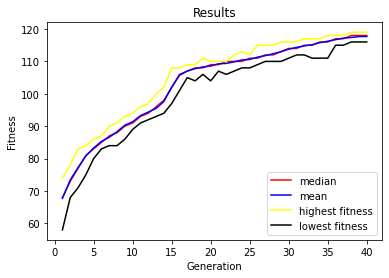

Final Generation: 
Median Fitness: 118.0 
Mean Fitness: 117.68888888888888 
Lowest: 116 out of 120 
Highest: 119 out of 120

Run 2 :


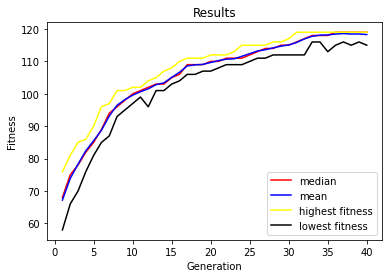

Final Generation: 
Median Fitness: 119.0 
Mean Fitness: 118.28888888888889 
Lowest: 115 out of 120 
Highest: 119 out of 120

Run 3 :


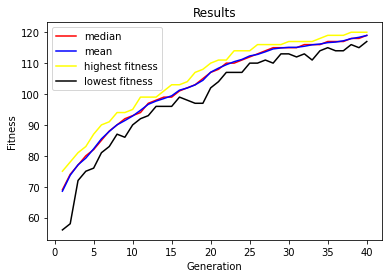

Final Generation: 
Median Fitness: 119.0 
Mean Fitness: 118.95555555555555 
Lowest: 117 out of 120 
Highest: 120 out of 120

Run 4 :


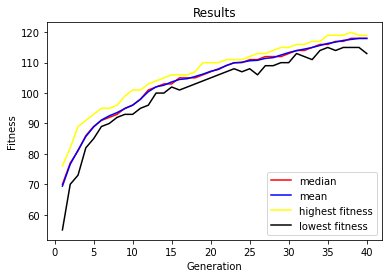

Final Generation: 
Median Fitness: 118.0 
Mean Fitness: 117.95555555555555 
Lowest: 113 out of 120 
Highest: 119 out of 120

Run 5 :


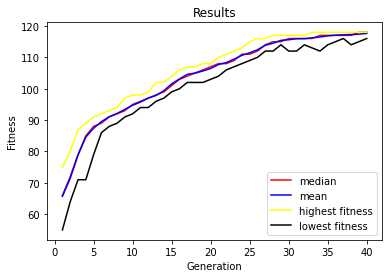

Final Generation: 
Median Fitness: 118.0 
Mean Fitness: 117.64444444444445 
Lowest: 116 out of 120 
Highest: 118 out of 120

Run 6 :


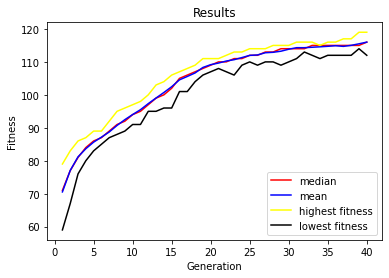

Final Generation: 
Median Fitness: 116.0 
Mean Fitness: 116.0 
Lowest: 112 out of 120 
Highest: 119 out of 120

Run 7 :


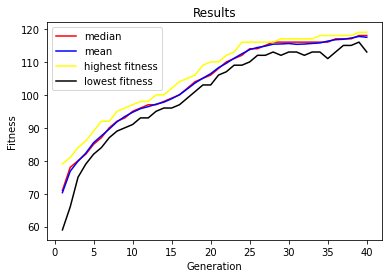

Final Generation: 
Median Fitness: 118.0 
Mean Fitness: 117.46666666666667 
Lowest: 113 out of 120 
Highest: 119 out of 120

Run 8 :


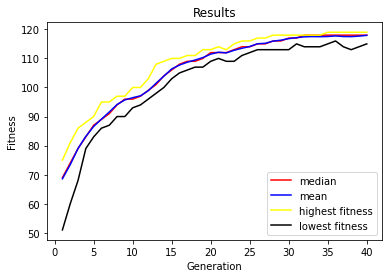

Final Generation: 
Median Fitness: 118.0 
Mean Fitness: 117.93333333333334 
Lowest: 115 out of 120 
Highest: 119 out of 120

Run 9 :


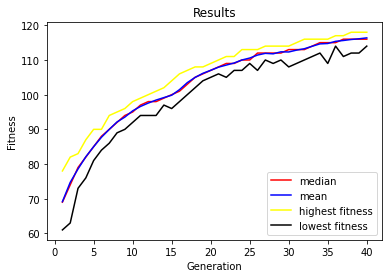

Final Generation: 
Median Fitness: 116.0 
Mean Fitness: 116.37777777777778 
Lowest: 114 out of 120 
Highest: 118 out of 120

Run 10 :


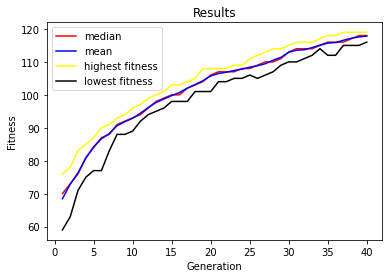

Final Generation: 
Median Fitness: 118.0 
Mean Fitness: 117.86666666666666 
Lowest: 116 out of 120 
Highest: 119 out of 120


In [132]:
### Print Conclusions - Test10
runs=0
print("TEST 10 CONCLUSIONS")
for i in test10_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

TEST 11 CONCLUSIONS

Run 1 :


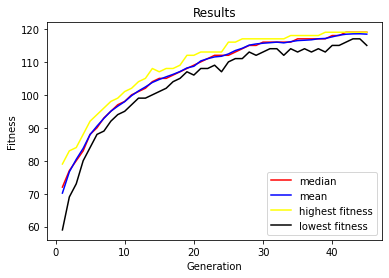

Final Generation: 
Median Fitness: 119.0 
Mean Fitness: 118.42222222222222 
Lowest: 115 out of 120 
Highest: 119 out of 120

Run 2 :


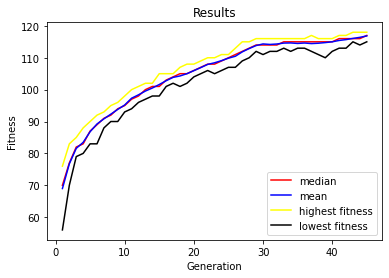

Final Generation: 
Median Fitness: 117.0 
Mean Fitness: 116.84444444444445 
Lowest: 115 out of 120 
Highest: 118 out of 120

Run 3 :


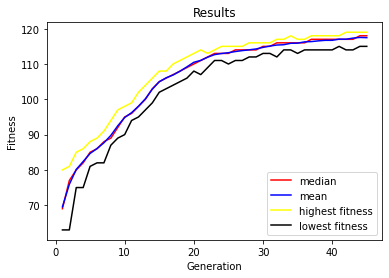

Final Generation: 
Median Fitness: 118.0 
Mean Fitness: 117.46666666666667 
Lowest: 115 out of 120 
Highest: 119 out of 120

Run 4 :


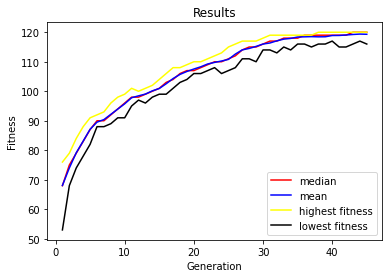

Final Generation: 
Median Fitness: 120.0 
Mean Fitness: 119.31111111111112 
Lowest: 116 out of 120 
Highest: 120 out of 120

Run 5 :


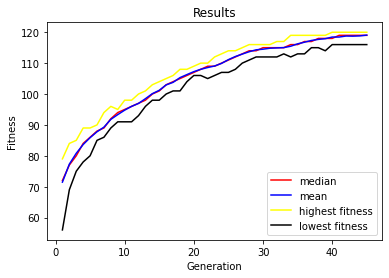

Final Generation: 
Median Fitness: 119.0 
Mean Fitness: 119.06666666666666 
Lowest: 116 out of 120 
Highest: 120 out of 120

Run 6 :


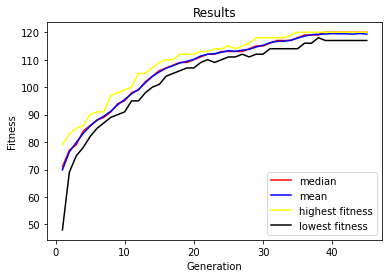

Final Generation: 
Median Fitness: 120.0 
Mean Fitness: 119.33333333333333 
Lowest: 117 out of 120 
Highest: 120 out of 120

Run 7 :


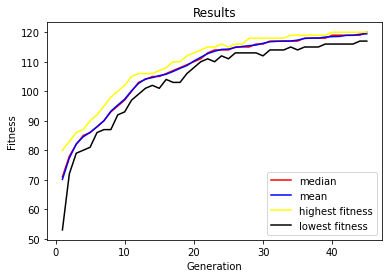

Final Generation: 
Median Fitness: 120.0 
Mean Fitness: 119.46666666666667 
Lowest: 117 out of 120 
Highest: 120 out of 120

Run 8 :


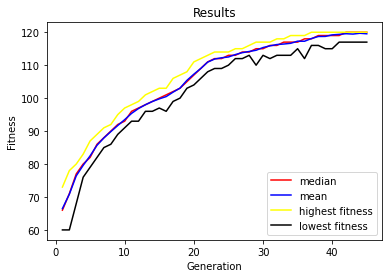

Final Generation: 
Median Fitness: 120.0 
Mean Fitness: 119.53333333333333 
Lowest: 117 out of 120 
Highest: 120 out of 120

Run 9 :


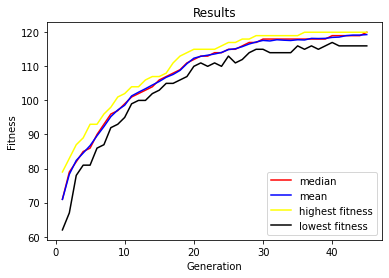

Final Generation: 
Median Fitness: 120.0 
Mean Fitness: 119.31111111111112 
Lowest: 116 out of 120 
Highest: 120 out of 120

Run 10 :


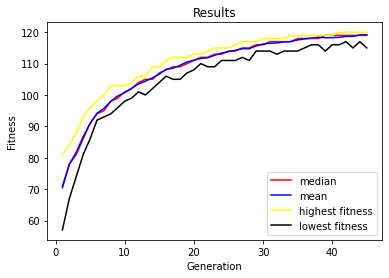

Final Generation: 
Median Fitness: 119.0 
Mean Fitness: 119.2 
Lowest: 115 out of 120 
Highest: 120 out of 120


In [145]:
### Print Conclusions - Test11
runs=0
print("TEST 11 CONCLUSIONS")
for i in test11_storage:
    print("\nRun", runs+1, ":" )
    output_to_graph(i[0], i[1], i[2], i[3], i[4])
    print("Final Generation: \nMedian Fitness: {} \nMean Fitness: {} \nLowest: {} out of 120 \nHighest: {} out of 120"
      .format(i[1][-1], i[2][-1], i[3][-1], i[4][-1]))
    runs+=1

# Questions and Answers:
## Fifty Fifty Hyper Parameters:

*Which parameter combination achieves optimal performance? Why do you 
think is the parameter combination successful?*

- The final test concluded the best combination that achieves optimal performance, without increasing the number of fitness evaluations extravagantly. These parameters are as follows:
  - number in population = 45 
  - number of generations = 45 
  - crossover probability = 0.85  
  - mutation probability = 0.01 
  - number of elements picked for tournament selection = 4
  
- I think this combination of parameters is successful at producing the optimal solution as the population is quite a high number, hence we explore and sample more of the search space. 
- As well as this, the number of elements picked for tournament selection is 4, which is perfect for the amount of elements in the population as opposed to 2, 3 or 5. This is due to the amount of individuals competing for the best fitness, as it is much more likely that an individual with a much higher fitness will be selected for the next generation. With a lower population, this number used for tournament selection would have more of a negative impact on the GA's performance, leading to stagnation instead of convergence. However, with the chosen population, this is the best performing parameter.
- The recommended probability of crossover is within [0.5, 0.8], however I found that slightly increasing this parameter from 0.8 to 0.85 had a very minor effect on the solution, increasing the performance of the GA to reach the best solution (120 out of 120). Although this parameter has a less prominent effect on the GA's performance, I saw a slight improvement with this chosen pobability.
- Probability of mutation had a significant impact on the GA's performance. The rule of thumb is that p_mut = 1 / number of bits, which would equal 0.00833333333 in this case. I kept the probability at 0.01, which is 1.2%, and this proved to be an prevalent factor of the GA's performance - if the probability is too high, it can be more detrimental than beneficial, however if it is too low, it will not have much of an impact at all. 

*Are there any drawbacks when using the identified 
parameter combination?*

- The only noticeable drawbacks is the amount of memory used, due to the number of fitness evaluations - this is to be expected with an increase in population and the number of generations. Although the final parameters have the largest amount of fitness evaluations, it is minimal compared to an even higher population, yet still performs very well. Increasing the population and amount of generations may improve the solution, however will be more inefficient as it will not fully utilize the GA. I feel that the final chosen parameters fully utilize the GA and reaches optimal performance, without a waste of memory or fitness evaulations.

In [212]:
#KNAPSACK PROBLEM

#Hyper Parameters
n_pop = 60 # population size
n_gen = 45 # number of generations
p_xo = 0.85  # crossover rate
p_mut = 0.01 # mutation rate 
n_Tselections = 5 # number of Tournament selections
neval = 0

#Knapsack configuration


w = np.array([10, 4,  7,  4,  5,  5,  5, 19, 15, 10, 3, 2, 18, 6, 7, 4, 4, 4, 4, 4, 7,  6, 7]) #total weight is 160
v = np.array([10, 2, 30, 14, 15, 16, 15, 15,  9, 10, 5, 5,  5, 5, 5, 3, 3, 3, 3, 3, 7, 12, 5]) # total value is 200
w_max = 50

n_bits = w.size
print(n_bits)
    
# KNAPSACK FITNESS FUNCTION - ONLY CHANGE FROM ORIGINAL PROGRAM is FITNESS_FUNC AND OUTPUT

def fitness_func(chromosome):
    global neval #increments every time fitness function is called - has to be a global variable for this to be possible
    neval = neval + 1
    v_i = np.sum(v[np.where(chromosome == 1)])
    w_i = np.sum(w[np.where(chromosome == 1)]) # sum of weights where corresponding bits in chromosome are 1 (not 0)
    if w_max < w_i:
        return 0 # lowest fitness (exceeds weight limit)
    else:
        return v_i # we want the value closest to the max weight
    
def output():
    for p in population:
        print('\nPopulation: ', p[0], '\nFitness: ' + str(p[1]) + ' out of 124') #124 is the max value you can have for the max weight (300)

#######################

population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            iandex_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
        
print("\nNumber of Fitness Evaluations:", neval)

fit_ = np.array([p[1] for p in population]) # (fitness of chromosome)
#print(fit_)
h_f=fit_.argmax() #h_f = highest fitness (index), the ighest value of fitness in the array would be np.amax(fit_)

highest=np.array([item[0] for item in population if item[1] == fit_[h_f]]) #create array of highest individuals (as there may be multiple)
h_w = np.sum(w[np.where(highest[0] == 1)]) # highest weight

chosen = np.array([np.where(highest[0]==1) for item in w]) # corresponding indices of boxes chosen for fittest individual

n_i = len(highest)
print("\nNumber of Individuals with highest fitness:", n_i)

#print(highest)
print("Chosen boxes:", chosen[0][0] + 1) # + 1 applied to a np array will increment each value within the array by 1


print("\nFittest individual:", highest[0], "\n\nWith Value:", fit_[h_f], "\n\nAnd Weight:", h_w) #pick first item of array, to print the highest individual (may be multiple copies)
#print("\nFitness of individual:", h_f)

print("\nBest Combination: w=50, v=124")

### best result calculated by this algorithm: w=50, v=124

23

Generation: 1

Population:  [0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1] 
Fitness: 0 out of 124

Population:  [0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1] 
Fitness: 0 out of 124

Population:  [1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1] 
Fitness: 0 out of 124

Population:  [1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1] 
Fitness: 0 out of 124

Population:  [1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0] 
Fitness: 0 out of 124

Population:  [0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0] 
Fitness: 0 out of 124

Population:  [1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0] 
Fitness: 0 out of 124

Population:  [0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1] 
Fitness: 0 out of 124

Population:  [1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0] 
Fitness: 0 out of 124

Population:  [0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0] 
Fitness: 41 out of 124

Population:  [0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1] 
Fitness: 0 out of 124

Population:  [1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1

# Knapsack Qs & As

*Did the GA find the optimal solution?*

- The GA found the optimal solution, and actually reached the same as the perfect solution found without using GAs. 

*Did you have to adjust the hyper-parameters?*

- I increased the population from 45 to 60 as this would drastically increase the optimal weight and value combination. With the increase in population, I also increased the number for tournament selection, as this positively impacts the performance exceptionally. Apart from these parameters, nothing else was changed.

In [52]:
## Function Optimisation:

import math

#Single objective: Hölder table Function
N = 20
n_bits = 2*N
v_range= [-10, 10]

def decimal(chromosome):
    dec = 0
    for i in range(len(chromosome)):
        if chromosome[i] == 1:
            dec += 2**i
    return dec

def chromosome_xy_conversion(chromosome):
    #p = pmin + [dec(b1, ..., bn)/(2**N-1)] * (pmax - pmin)
    
    x = v_range[0] + decimal(chromosome[0:N])/(2**N-1)*(v_range[1]-v_range[0])
    y = v_range[0] + decimal(chromosome[N:n_bits])/(2**N-1)*(v_range[1]-v_range[0])
    
    return x, y

def Holder_Table(x, y):
    return -1*(abs(math.sin(x)*math.cos(y)*math.exp(abs(1-((math.sqrt(x**2+y**2))/math.pi)))))

def fitness_func(chromosome):
    global neval
    neval= neval + 1
    x, y = chromosome_xy_conversion(chromosome)
    return -Holder_Table(x, y)
    
def output():
    for p in population:
        x, y = chromosome_xy_conversion(p[0])
        print('\nPopulation: ', p[0], '\nFitness: ' + str(p[1]))
        print(' f( ' + str(x) + ' , ' + str(y) + ' ) ')
    
population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            iandex_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
        
#Hyper Parameters
n_pop = 45 # population size
n_gen = 45 # number of generations
p_xo = 0.85 # crossover rate
p_mut = 0.01 # mutation rate 
n_Tselections = 4 # number of Tournament selections
neval=0
population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            iandex_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
        
print("\nNumber of Fitness Evaluations:", neval)

fit_ = np.array([p[1] for p in population]) # (fitness of chromosome)
#print(fit_)
h_f = np.amax(fit_) #h_f = highest fitness (index), the ighest value of fitness in the array would be np.amax(fit_)

highest=np.array([item[0] for item in population if item[1] == h_f]) #create array of highest individuals (as there may be multiple)

n_i = len(highest)
print("\nNumber of Individuals with highest fitness:", n_i)

print("\nFittest individual:", highest[0]) #pick first item of array, to print the highest individual (may be multiple copies)
print("\nFitness of individual:", h_f)

x, y = chromosome_xy_conversion(highest[0])
print(' f( ' + str(x) + ' , ' + str(y) + ' ) ')

print("\nBest min solutions: \n f(8.05502, 9.66459) \n f(-8.05502, 9.66459) \n f(8.05502, -9.66459) \n f(-8.05502, -9.66459)")


Generation: 1

Population:  [1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1
 0 0 1] 
Fitness: 1.6555343123815043
 f( -8.437059819278545 , 1.9210547647998482 ) 

Population:  [0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1
 1 1 0] 
Fitness: 1.07969412202235
 f( -1.9629974012350093 , -0.5987268435734201 ) 

Population:  [1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0] 
Fitness: 0.7544888320610947
 f( -3.2310612021076226 , -9.31783611091243 ) 

Population:  [1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0
 0 1 1] 
Fitness: 1.9009506188592935
 f( 2.3187945545144615 , 5.914932169849559 ) 

Population:  [1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1
 0 0 1] 
Fitness: 0.2849216790184119
 f( -4.622168180626087 , 1.7330853777746 ) 

Population:  [1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1
 1 0 0] 
Fitness: 0.725548806263651

In [235]:
## Function Optimisation:

import math

#Constrained optimisation - Simionescu Function
N = 20
n_bits = 2*N
v_range= [-1.25, 1.25]

def decimal(chromosome):
    dec = 0
    for i in range(len(chromosome)):
        if chromosome[i] == 1:
            dec += 2**i
    return dec

def chromosome_xy_conversion(chromosome):
    #p = pmin + [dec(b1, ..., bn)/(2**N-1)] * (pmax - pmin)
    
    x = v_range[0] + decimal(chromosome[0:N])/(2**N-1)*(v_range[1]-v_range[0])
    y = v_range[0] + decimal(chromosome[N:n_bits])/(2**N-1)*(v_range[1]-v_range[0])
    
    return x, y

def simionescu(x, y):
    func = 0.1 * x * y
    g = (1 + 0.2*math.cos(8*math.atan(x/y))**2) - x**2 - y**2 
    if g <= 0:
        func += 0.104 * g**2 #tweak coefficient - this is the optimal value (r=0.104)
    return func

def fitness_func(chromosome):
    global neval
    neval= neval + 1
    x, y = chromosome_xy_conversion(chromosome)
    return -simionescu(x, y)
    
def output():
    for p in population:
        x, y = chromosome_xy_conversion(p[0])
        print('\nPopulation: ', p[0], '\nFitness: ' + str(p[1]))
        print(' f( ' + str(x) + ' , ' + str(y) + ' ) ')
    
population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            iandex_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
        
#Hyper Parameters
n_pop = 45 # population size
n_gen = 45 # number of generations
p_xo = 0.8 # crossover rate
p_mut = 0.045 # mutation rate 
n_Tselections = 3 # number of Tournament selections
neval=0
population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            iandex_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
        
print("\nNumber of Fitness Evaluations:", neval)

fit_ = np.array([p[1] for p in population]) # (fitness of chromosome)
#print(fit_)
h_f = np.amax(fit_) #h_f = highest fitness (index), the ighest value of fitness in the array would be np.amax(fit_)

highest=np.array([item[0] for item in population if item[1] == h_f]) #create array of highest individuals (as there may be multiple)

n_i = len(highest)
print("\nNumber of Individuals with highest fitness:", n_i)
    
print("\nFittest individual:", highest[0]) #pick first item of array, to print the highest individual (may be multiple copies)
print("\nFitness of individual:", h_f)

x, y = chromosome_xy_conversion(highest[0])
print(' f( ' + str(x) + ' , ' + str(y) + ' ) ')

print("\nBest min solutions: \n f(0.84852813, -0.84852813) \n f(-0.84852813, 0.84852813)")


Generation: 1

Population:  [0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 1] 
Fitness: -0.04635007262740244
 f( -1.1586712919915123 , 1.0469720811577616 ) 

Population:  [1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0
 0 1 0] 
Fitness: -0.04708616119718706
 f( -0.9440586033426317 , -0.4977719762534869 ) 

Population:  [1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1
 1 0 1] 
Fitness: 0.017181070437621293
 f( -1.2488865841737595 , 0.590438213766302 ) 

Population:  [1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 0 1] 
Fitness: -0.0023624851837275055
 f( 0.16218558519896042 , 0.1456655460982761 ) 

Population:  [1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0
 0 1 0] 
Fitness: 0.04872131346593851
 f( 0.9363409865770214 , -0.5308573540280858 ) 

Population:  [0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 0 1 0] 
Fitnes

# Function Optimisation

*Did the GA find the minimum?* 

- The GA found the minimum for both single-objective and constrained optimisation functions, with a usual error (difference) of ~(0.0002, 0.0002) [4dp] (Hölder Table) and ~(0.0001, 0.0001) [4dp] (Simionescu) from the perfect solutions.

*How precise is the solution? How can you improve the solution?*

- The solution is very precise, as shown by the difference above. I improved the single objective function's performance by increasing N from 10 to 20 - this drastically improved the solution, making it much more precise and closer to the minimum for the Hölder Table Function. This is likely due to the value range becoming more accurate, by being represented by a larger number of bits within each chromosome. I could perhaps improve the solution by further increasing the nuber of bits, however this could also cause more error, therefore it could prove more detrimental as it can beneficial.

- The Simionescu Function solution was improved dramatically by changing the coefficient, r, in the penalty constraint method, to 0.104. I could further improve this by finding a more accurate coefficient, however this would require increasing the decimal places, which is already to 3. 

In [273]:
import math
## Free Choice (1) - optimisation problem:

#    Find best rational approx. of PI using integers between 0 and 1023

n_pop = 100 # population size 
n_gen = 50 # number of generations
p_xo = 0.7  # crossover rate
p_mut = 0.01 # mutation rate (DECREASED TO 0.06)
n_bits = 20 #(2 x 10)
n_Tselections = 3 # number of Tournament selections

def fitness_func(chromosome):
    global neval
    neval = neval + 1
    x1 = decimal(chromosome[:11]) # 10 bits (0 to 10 inclusive)
    x2 = decimal(chromosome[11:]) # 10 bits (11 to 20 inclusive)
    if x2 == 0:
        x2 = 1 # cannot divide by zero - added constraint
    return -U(x1, x2)

def U(x1, x2):
    return abs((x1/x2) - math.pi)

def output():
    for p in population:
        print('\nPopulation: ', p[0], '\nFitness: ' + str(p[1]), '\nx1 =', decimal(p[0][:11]), '\nx2 =', decimal(p[0][11:]))


population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            iandex_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
        

print("\nNumber of Fitness Evaluations:", neval)

### METHOD OF FINDING FITTEST INDIVIDUAL (2) - results

fit_ = np.array([p[1] for p in population]) # (fitness of chromosome)

h_f = np.amax(fit_)
highest=np.array([item[0] for item in population if item[1] == h_f]) #create array of highest individuals (as there may be multiple)

# number of individuals that have the highest fitness, h_f

n_i = len(highest)
print("\nNumber of Individuals with highest fitness:", n_i)


#print(highest)
print("\nFittest individual:", highest[0]) #pick first item of array, to print the hoghest individual (may be multiple copies)
print("\nFitness of individual:", h_f)

print("\nGA has calculated Pi (x1/x2) as:\n", decimal(highest[0][:11]), "/", decimal(highest[0][11:]), "which equals (to 5dp)", round((decimal(highest[0][:11])/decimal(highest[0][11:])), 5)) 

print("\nBest Solution: \nx1 = 355, x2 = 113 \n 355/113 = 3.14159")



Generation: 1

Population:  [0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1] 
Fitness: -0.1877724257752864 
x1 = 1678 
x2 = 504

Population:  [1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1] 
Fitness: -0.5784234887075663 
x1 = 1197 
x2 = 467

Population:  [1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0] 
Fitness: -11.13519306069592 
x1 = 1599 
x2 = 112

Population:  [0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0] 
Fitness: -1.9480442664930189 
x1 = 222 
x2 = 186

Population:  [1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1] 
Fitness: -0.07686051073265032 
x1 = 1373 
x2 = 448

Population:  [0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0] 
Fitness: -47.78148426948712 
x1 = 1986 
x2 = 39

Population:  [0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1] 
Fitness: -2.42746811989087 
x1 = 2016 
x2 = 362

Population:  [1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1] 
Fitness: -1.3952158419955902 
x1 = 723 
x2 = 414

Population:  [1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1] 
Fitness: -1.1084073464102069 
x1 = 1921 
x2 = 452

Population:  [1 1 0 0 0 0 1

In [244]:
### Free choice (2) - Function Optimisation

import math

#Single objective: Cross_in_tray Function

N = 20 #increasing this from 10 to 20 has resulted in a much more accurate solution
n_bits = 2*N
v_range= [-10, 10]

def decimal(chromosome):
    dec = 0
    for i in range(len(chromosome)):
        if chromosome[i] == 1:
            dec += 2**i
    return dec

def chromosome_xy_conversion(chromosome):
    #p = pmin + [dec(b1, ..., bn)/(2**N-1)] * (pmax - pmin)
    
    x = v_range[0] + decimal(chromosome[0:N])/(2**N-1)*(v_range[1]-v_range[0])
    y = v_range[0] + decimal(chromosome[N:n_bits])/(2**N-1)*(v_range[1]-v_range[0])
    
    return x, y

def cross_in_tray(x, y):
    return -0.0001 * (abs(math.sin(x) * math.sin(y) * math.exp(abs(100 - (math.sqrt(x**2 + y**2) / math.pi)))) + 1)**0.1

def fitness_func(chromosome):
    global neval
    neval= neval + 1
    x, y = chromosome_xy_conversion(chromosome)
    return -cross_in_tray(x, y)
    
def output():
    for p in population:
        x, y = chromosome_xy_conversion(p[0])
        print('\nPopulation: ', p[0], '\nFitness: ' + str(p[1]))
        print(' f( ' + str(x) + ' , ' + str(y) + ' ) ')
    
population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            iandex_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
        
#Hyper Parameters
n_pop = 45 # population size
n_gen = 45 # number of generations
p_xo = 0.85 # crossover rate
p_mut = 0.045 # mutation rate 
n_Tselections = 3 # number of Tournament selections
neval = 0
population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            iandex_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
        
print("\nNumber of Fitness Evaluations:", neval)

fit_ = np.array([p[1] for p in population]) # (fitness of chromosome)
#print(fit_)
h_f = np.amax(fit_) #h_f = highest fitness (index), the ighest value of fitness in the array would be np.amax(fit_)

highest=np.array([item[0] for item in population if item[1] == h_f]) #create array of highest individuals (as there may be multiple)

n_i = len(highest)
print("\nNumber of Individuals with highest fitness:", n_i)

print("\nFittest individual:", highest[0]) #pick first item of array, to print the highest individual (may be multiple copies)
print("\nFitness of individual:", h_f)

x, y = chromosome_xy_conversion(highest[0])
print(' f( ' + str(x) + ' , ' + str(y) + ' ) ')
    
print("\nBest min solutions: \n f(1.34941, -1.34941) \n f(1.34941, 1.34941) \n f(-1.34941, 1.34941) \n f(-1.34941, -1.34941)")


Generation: 1

Population:  [0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0
 1 0 1] 
Fitness: 1.375179233545534
 f( 2.365391126052023 , 3.187039553679993 ) 

Population:  [1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 0 0 0] 
Fitness: 1.4937757703571364
 f( -2.828305080704766 , -7.988317478482703 ) 

Population:  [0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 1] 
Fitness: 1.5865752555006236
 f( 6.621452924206661 , 1.3372147915027544 ) 

Population:  [0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1
 0 1 0] 
Fitness: 1.5733111829543438
 f( -0.7877643468516791 , -3.0099039172209903 ) 

Population:  [0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 1 1] 
Fitness: 1.3967569912756597
 f( 2.989132870800848 , 7.838075483394128 ) 

Population:  [1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0
 1 1 1] 
Fitness: 1.371036506848979

In [271]:
### Free choice (3) - Function Optimisation:

import math

#Constrained optimisation - Gomez and Levy function (modified)
N = 20
n_bits = 2*N
v_range_x = [-1.5, 0.75]
v_range_y = [-1, 1]

def decimal(chromosome):
    dec = 0
    for i in range(len(chromosome)):
        if chromosome[i] == 1:
            dec += 2**i
    return dec

def chromosome_xy_conversion(chromosome):
    #p = pmin + [dec(b1, ..., bn)/(2**N-1)] * (pmax - pmin)
    
    x = v_range_x[0] + decimal(chromosome[0:N])/(2**N-1)*(v_range_x[1]-v_range_x[0])
    y = v_range_y[0] + decimal(chromosome[N:n_bits])/(2**N-1)*(v_range_y[1]-v_range_y[0])
    
    return x, y

def gomez_levy_mod(x, y):
    func = (4 * x**2) - (2.1 * x**4) + (1/3) * x**6 + (x*y) - (4 * y**2) + (4 * y**4)
    g = 1.5 - (-1 * math.sin(4 * math.pi * x)) - 2 * math.sin(2 * math.pi * y)**2 
    if g <= 0 :
        func += 1 * g**2 #tweak coefficient - this is the optimal value
    return func

def fitness_func(chromosome):
    global neval
    neval = neval + 1
    x, y = chromosome_xy_conversion(chromosome)
    return -gomez_levy_mod(x, y)
    
def output():
    for p in population:
        x, y = chromosome_xy_conversion(p[0])
        print('\nPopulation: ', p[0], '\nFitness: ' + str(p[1]))
        print(' f( ' + str(x) + ' , ' + str(y) + ' ) ')
    
population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            iandex_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
        
#Hyper Parameters
n_pop = 45 # population size
n_gen = 45 # number of generations
p_xo = 0.8 # crossover rate
p_mut = 0.01 # mutation rate 
n_Tselections = 4 # number of Tournament selections
neval = 0
population = init_pop(n_pop)

for generation in range(n_gen):
    print("\nGeneration:", generation+1)
    output()
    for individual in range(n_pop):
        if np.random.random() < p_xo:
            #print("CROSSOVER")
            index_i = crossover()
        else:
            #print("CLONING")
            iandex_i = tournament_select(False)
        #print(MUTATION)
        flip_mutation(index_i)
        
print("\nNumber of Fitness Evaluations:", neval)

fit_ = np.array([p[1] for p in population]) # (fitness of chromosome)
#print(fit_)
h_f = np.amax(fit_) #h_f = highest fitness (index), the ighest value of fitness in the array would be np.amax(fit_)

highest=np.array([item[0] for item in population if item[1] == h_f]) #create array of highest individuals (as there may be multiple)

n_i = len(highest)
print("\nNumber of Individuals with highest fitness:", n_i)
    
print("\nFittest individual:", highest[0]) #pick first item of array, to print the highest individual (may be multiple copies)
print("\nFitness of individual:", h_f)
    
x, y = chromosome_xy_conversion(highest[0])
print(' f( ' + str(x) + ' , ' + str(y) + ' ) ')

print("\nGlobal Minimum: \n f(0.08984301, -0.712654)")


Generation: 1

Population:  [0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0
 0 0 1] 
Fitness: -0.5250888370749203
 f( -0.4033230813246549 , 0.09269055623107558 ) 

Population:  [1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0
 1 0 0] 
Fitness: -1.3173742241361484
 f( 0.37532293827337115 , -0.7215077605321507 ) 

Population:  [0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1
 0 0 1] 
Fitness: -0.9317111089858607
 f( -0.5381117230527144 , 0.15669360799179843 ) 

Population:  [0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1
 1 0 0] 
Fitness: -0.0653203232081429
 f( -0.43208926400114445 , -0.5531859905109315 ) 

Population:  [0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 0 0] 
Fitness: -1.660447200386794
 f( -0.8975752807381446 , -0.6972500774861121 ) 

Population:  [0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0
 0 0 1] 
Fitness